In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [2]:
proyectos = read_csv("data/mapeo_investigadores.csv")

In [3]:
mini = proyectos["Fuente de información"]
mini

0                          Bibliografía
1                Proyectos MediaLab UGR
2                Proyectos MediaLab UGR
3                               GrinUGR
4                          Bibliografía
                     ...               
598    Agencia Estatal de Investigación
599                       Fuente propia
600                        Bibliografía
601                        Web personal
602    Agencia Estatal de Investigación
Name: Fuente de información, Length: 603, dtype: object

In [4]:
sources_list = mini.tolist()
def_list = []
for item in sources_list:
    if "," in item:
        comas = item.split(", ")
        for element in comas:
            def_list.append(element.strip())
    else: 
        def_list.append(item.strip())

In [5]:
counter = Counter(def_list).most_common()

In [6]:
sources_dict = dict(counter)

In [7]:
acronimos = read_csv("data/Fuentes-Table 1.csv")
acronimos = acronimos.set_index('Fuente propia')

In [8]:
acronimos_dict = acronimos.T.to_dict('records')

In [9]:
acronimos_dict = acronimos_dict[0]
acronimos

,Acrónimo
Fuente propia,
Agencia Estatal de Investigación,AEI
Bibliografía,Biblio
Congresos Humanidades Digitales Hispánicas,CHDH
CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: VISIBILIDAD Y DIFUSIÓN DE LA INVESTIGACIÓN,CHDH2
GrinUGR,GrinUGR
Fundación BBVA,FBBVA
Fuente propia,Propia
Red Knowmetrics,RedK
Congreso Territorios digitales,CTD


In [10]:
# new dict with acronims
corrected_dict = {}
for key, value in sources_dict.items():
    corrected_dict.update({ acronimos_dict.get(key, "No especificado"): value }) 

# Print treemap

In [12]:
import squarify

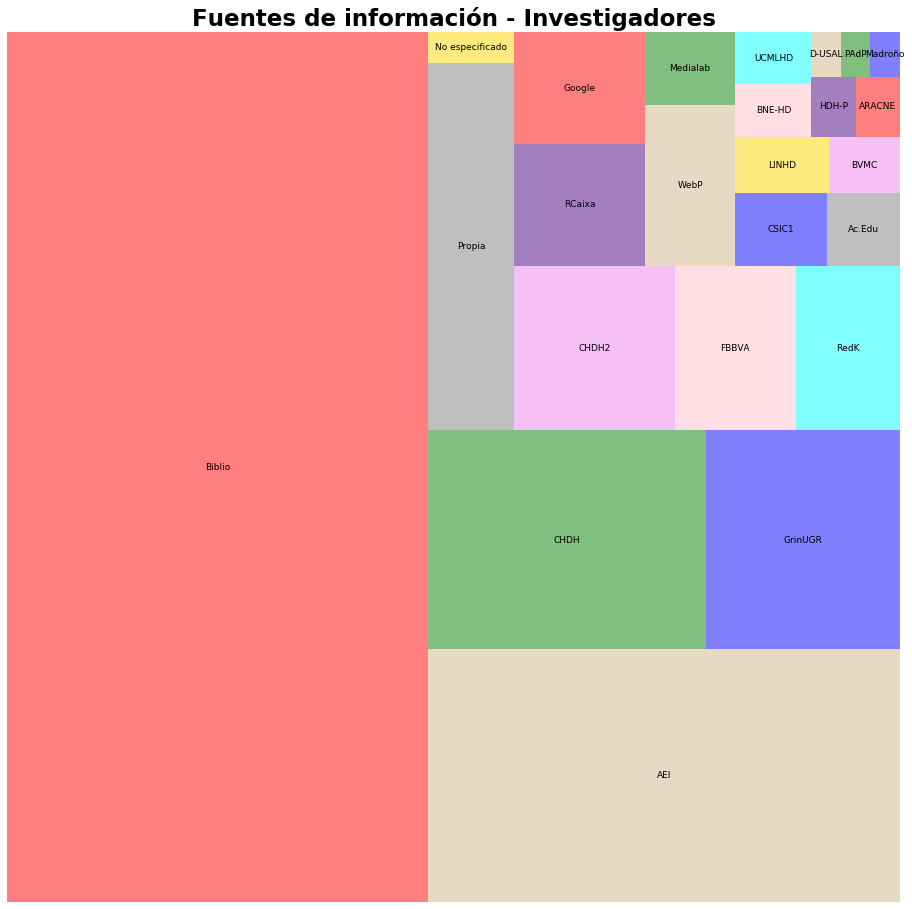

In [14]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, text_kwargs={'fontsize':9})
plt.title("Fuentes de información - Investigadores",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [15]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
Bibliografía,276
Agencia Estatal de Investigación,90
Congresos Humanidades Digitales Hispánicas,46
GrinUGR,32
Fuente propia,24
Congreso Territorio digitales,23
CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: VISIBILIDAD Y DIFUSIÓN DE LA INVESTIGACIÓN,20
Fundación BBVA,15
Red Knowmetrics,13
Proyectos subvencionados RecerCaixa,12
